## Processors EDA
`Processors.xlsx`

### Importing libraries for the project

In [1]:
import pandas as pd, plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from rich.console import Console
import warnings
cons = Console()
warnings.filterwarnings("ignore")
sns.set_theme(rc={'figure.figsize':(20,8.27)})

### Reading Dataset through Excel as CSV isn't in proper format

In [2]:
df = pd.read_excel('https://raw.githubusercontent.com/SoultySprings/processors-smart-devices/master/EDA/Processors.xlsx')

#### Removing columns that either have a lot of null data or are irrelevant to the analysis as well as checking the unique columns throughout the dataset

In [3]:
dfN = df.drop_duplicates().drop(columns=['Codename','Address Bus Width','Non-volatile Memory Data Bus Width',]).copy()
col = dfN.columns.tolist()
dfN.info()
print(col)

<class 'pandas.core.frame.DataFrame'>
Index: 1020 entries, 0 to 1020
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Designer                             1020 non-null   object 
 1   Serie                                676 non-null    object 
 2   Type                                 1020 non-null   object 
 3   Year Released                        1020 non-null   int64  
 4   Function                             1020 non-null   object 
 5   Width of Machine Word                1020 non-null   object 
 6   Supported Instruction Set(s)         1019 non-null   object 
 7   Type of processor core(s)            1014 non-null   object 
 8   Number of processor core(s)          1020 non-null   int64  
 9   Memory Interface(s)                  1020 non-null   object 
 10  Max. Clock Frequency of Memory IF    544 non-null    object 
 11  Data Bus Width                     

### Counting the number of unique quantities per column to their total to use for further Data Visualization

In [4]:
n=0
for value in col:
    unqiuePercentage = round(100-((dfN[f'{value}'].nunique())/(dfN[f'{value}'].count()))*100, 5)
    print(f'{value:<40} : {dfN[f'{value}'].nunique() :<10} : {dfN[f'{value}'].count() :<10} : {unqiuePercentage}')
    col.append(f'{value}')
    n+=1
    if n==48:
        break

Designer                                 : 46         : 1020       : 95.4902
Serie                                    : 40         : 676        : 94.08284
Type                                     : 1020       : 1020       : 0.0
Year Released                            : 45         : 1020       : 95.58824
Function                                 : 6          : 1020       : 99.41176
Width of Machine Word                    : 4          : 1020       : 99.60784
Supported Instruction Set(s)             : 62         : 1019       : 93.9156
Type of processor core(s)                : 243        : 1014       : 76.0355
Number of processor core(s)              : 11         : 1020       : 98.92157
Memory Interface(s)                      : 62         : 1020       : 93.92157
Max. Clock Frequency of Memory IF        : 43         : 544        : 92.09559
Data Bus Width                           : 6          : 885        : 99.32203
Number of data bus channels              : 6          : 1003       : 99.

### Shortening it down to the ones which have higher uniquity to non-null data

In [5]:
dfTemp = dfN.fillna(value='N/A').copy()
col2 = []
for value in col:
    if dfN[f'{value}'].count() > 1000 and (round(100-((dfN[f'{value}'].nunique())/(dfN[f'{value}'].count()))*100, 5)) > 90:
        unqiuePercentage = round(100-((dfN[f'{value}'].nunique())/(dfN[f'{value}'].count()))*100, 5)
        print(f'{value:<40} : {dfN[f'{value}'].nunique() :<10} : {dfN[f'{value}'].count()} : {unqiuePercentage}')
        col2.append(f'{value}')

print(f'\n{col2}')

Designer                                 : 46         : 1020 : 95.4902
Year Released                            : 45         : 1020 : 95.58824
Function                                 : 6          : 1020 : 99.41176
Width of Machine Word                    : 4          : 1020 : 99.60784
Supported Instruction Set(s)             : 62         : 1019 : 93.9156
Number of processor core(s)              : 11         : 1020 : 98.92157
Memory Interface(s)                      : 62         : 1020 : 93.92157
Number of data bus channels              : 6          : 1003 : 99.40179
Non-volatile Memory Interface            : 76         : 1019 : 92.54171
Semiconductor Technology                 : 5          : 1020 : 99.5098
Supported USB Specification              : 11         : 1018 : 98.91945
Bluetooth support                        : 9          : 1018 : 99.11591
Wireless LAN support                     : 8          : 1018 : 99.21415
Supported Audio/Video Interface          : 25         : 1019 : 97.5

### Figuring the chips that have the highest Special Features and maybe successfull as well


In [6]:
dfTemp = dfN['Special Features'].str.split(',', expand= True)
dfTemp.dropna(thresh=39).head(10)

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
71,single Qualcomm Kryo Prime (1x ARM Cortex-X3 u...,1 Mbyte L2 cache) + dual Qualcomm Kryo Gold (...,512 Kbyte L2 cache per core) + dual Qualcomm ...,512 Kbyte L2 cache per core) + triple Qualcom...,HMP,big.LITTLE,up to 16 GiB of RAM,4 GiB system cache,Hexagon DSP,Qualcomm X70 5G NR Modem,...,18-bit triple Qualcomm Image Signal Processors,200 MP camera support,64 MP + 36 MP dual lens camera support,EIS 3.0,Qualcomm Quick Charge 5,None,None,None,None,None
117,single Qualcomm Kryo Prime (1x ARM Cortex-X2 u...,1 Mbyte L2 cache) + triple Qualcomm Kryo Gold...,512 Kbyte L2 cache per core) + quad Qualcomm ...,HMP,big.LITTLE,up to 16 GiB of RAM,4 GiB system cache,Hexagon DSP,Qualcomm X65 5G NR Modem,CDMA 2000 1x Adv./DO Rel 0.,...,18-bit triple Qualcomm Image Signal Processors,200 MP camera support,64 MP + 36 MP dual lens camera support,EIS 3.0,HDMI 2.0,None,None,None,None,None
144,single Qualcomm Kryo Prime (1x ARM Cortex-X2 u...,1 Mbyte L2 cache) + triple Qualcomm Kryo Gold...,512 Kbyte L2 cache per core) + quad Qualcomm ...,HMP,big.LITTLE,up to 16 GiB of RAM,4 GiB system cache,Hexagon DSP,Qualcomm X65 5G NR Modem,CDMA 2000 1x Adv./DO Rel 0.,...,18-bit triple Qualcomm Image Signal Processors,200 MP camera support,64 MP + 36 MP dual lens camera support,EIS 3.0,HDMI 2.0,None,None,None,None,None
153,quad Qualcomm Kryo 485 Gold Harvard Superscala...,3x ARM Cortex-A76 up to 2419 MHz,1280 Kbyte L2 cluster cache) + quad Qualcomm ...,512 Kbyte L2 cluster cache) Harvard Superscal...,HMP,big.LITTLE,up to 16 GiB RAM,Hexagon 690 DSP,Qualcomm X24 LTE Modem,CDMA 2000 1x Adv./DO Rel 0,...,Renderscript Compute,FlexRender support,Qualcomm Spectra 14-bit dual Qualcomm Spectra...,48 MP camera support,24 MP + 24 MP dual lens camera support,EIS 3.0,HDMI 2.0,Qualcomm Quick Charge 4.0/4.0+,None,None
154,quad Qualcomm Kryo 585 Gold Harvard Superscala...,3x ARM Cortex-A77 up to 2.4 GHz,1 Mbyte L2 cluster cache) + quad Qualcomm Kry...,512 Kbyte L2 cluster cache) Harvard Superscal...,3 Mbyte System cache,HMP,big.LITTLE,quad-channel 16-bit 2133 MHz LPDDR4X / 2750 M...,Hexagon 698 DSP,Qualcomm X55 5G NR Modem,...,Vulkan 1.1,Qualcomm Spectra 14-bit dual Qualcomm Spectra...,64 MP camera support,25 MP + 25 MP dual lens camera support,EIS 3.0,HDMI 2.0,Qualcomm Quick Charge 4.0/4.0+,None,None,None
199,quad Qualcomm Kryo 585 Gold Harvard Superscala...,3x ARM Cortex-A77 up to 2.4 GHz,1 Mbyte L2 cluster cache) + quad Qualcomm Kry...,512 Kbyte L2 cluster cache) Harvard Superscal...,3 Mbyte System cache,HMP,big.LITTLE,quad-channel 16-bit 2133 MHz LPDDR4X / 2750 M...,Hexagon 698 DSP,Qualcomm X55 5G NR Modem,...,Vulkan 1.1,Qualcomm Spectra 14-bit dual Qualcomm Spectra...,64 MP camera support,25 MP + 25 MP dual lens camera support,EIS 3.0,HDMI 2.0,Qualcomm Quick Charge 4.0/4.0+,None,None,None
204,quad Qualcomm Kryo 585 Gold Harvard Superscala...,3x ARM Cortex-A77 up to 2.42 GHz,1 Mbyte L2 cluster cache) + quad Qualcomm Kry...,512 Kbyte L2 cluster cache) Harvard Superscal...,3 Mbyte System cache,HMP,big.LITTLE,quad-channel 16-bit 2133 MHz LPDDR4X / 2750 M...,Hexagon 698 DSP,Qualcomm X55 5G NR Modem,...,Vulkan 1.1,Qualcomm Spectra 14-bit dual Qualcomm Spectra...,64 MP camera support,25 MP + 25 MP dual lens camera support,EIS 3.0,HDMI 2.0,Qualcomm Quick Charge 4.0/4.0+,None,None,None
228,SDM855+,quad Qualcomm Kryo 485 Gold Harvard Superscal...,3x ARM Cortex-A76 up to 2419 MHz,1 Mbyte L2 cluster cache) + quad Qualcomm Kry...,512 Kbyte L2 cluster cache) Harvard Superscal...,HMP,big.LITTLE,up to 12 GiB RAM,Hexagon 690 DSP,Qualcomm X24 LTE Modem,...,Qualcomm VIVE 802.11ac/802.11ad,Renderscript Compute,FlexRender support,Qualcomm Spectra 14-bit dual Qualcomm Spectra...,48 MP camera support,24 MP + 24 MP dual lens camera support,EIS 3.0,HDMI 2.0,Qualcomm Quick Charge 4.0/4.0+,None
231,SDM855,quad Qualcomm Kryo 485 Gold Harvard Superscal...,3x ARM Cortex-A76 up to 2419 MHz,1280 Kbyte L2 cluster cache) + quad Qualcomm ...,512 Kb

### Graphing
#### Below are the top companies and their count, text data also given for better understanding

Top Companies with Highest number of chips =>

Qualcomm : 216, MediaTek : 98, Intel : 85, Samsung : 62, HiSilicon : 44, Texas Instruments : 43, NVIDIA : 22, UNISOC : 12, Apple : 11, Rockchip : 11, Marvell : 9, ST-Ericsson : 9, STMicroelectronics : 7, Toshiba : 6, AMD : 5, Centrality : 5, Nokia : 4, Leadcore : 4, VIA : 4, Motorola : 4, SiRF : 4, Philips : 3, Xiaomi : 2, RMI : 2, Hitachi : 2, Sony : 1, Renesas : 1, 



Top Series that are in use the most =>

Snapdragon : 189, Exynos : 58, Dimensity : 50, Helio : 45, KIRIN : 44, OMAP : 40, Atom : 38, Core : 26, MSM : 25, Tegra : 22, XScale : 12, Bionic : 11, RK : 11, ARMADA : 9, Celeron : 8, Tiger : 7, Atlas : 7, Nomadik : 7, TMPR : 6, NovaThor : 6, Tanggula : 5, Google tensor : 4, InnoPower : 4, WonderMedia PRIZM : 4, Rapido : 4, DragonBall : 4, Kompanio : 3, Nova : 3, SuperH : 3, Elan : 3, Nexperia : 3, Pinecone : 2, Am : 2, Sitara : 2, ESM : 2, Alchemy : 2, Titan : 2, Pentium : 1, DaVinci : 1, CXD : 1, 

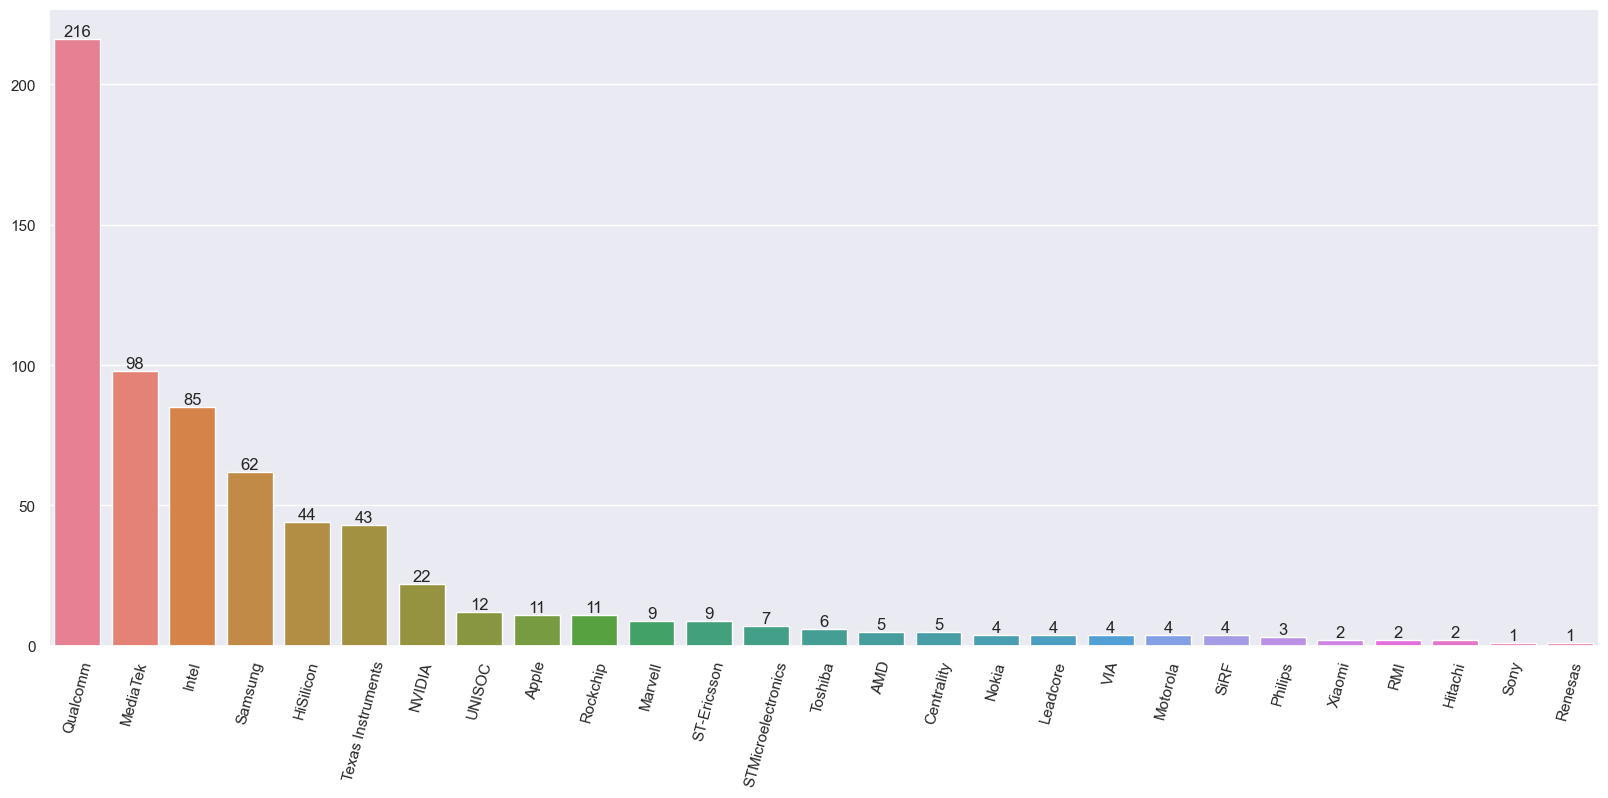

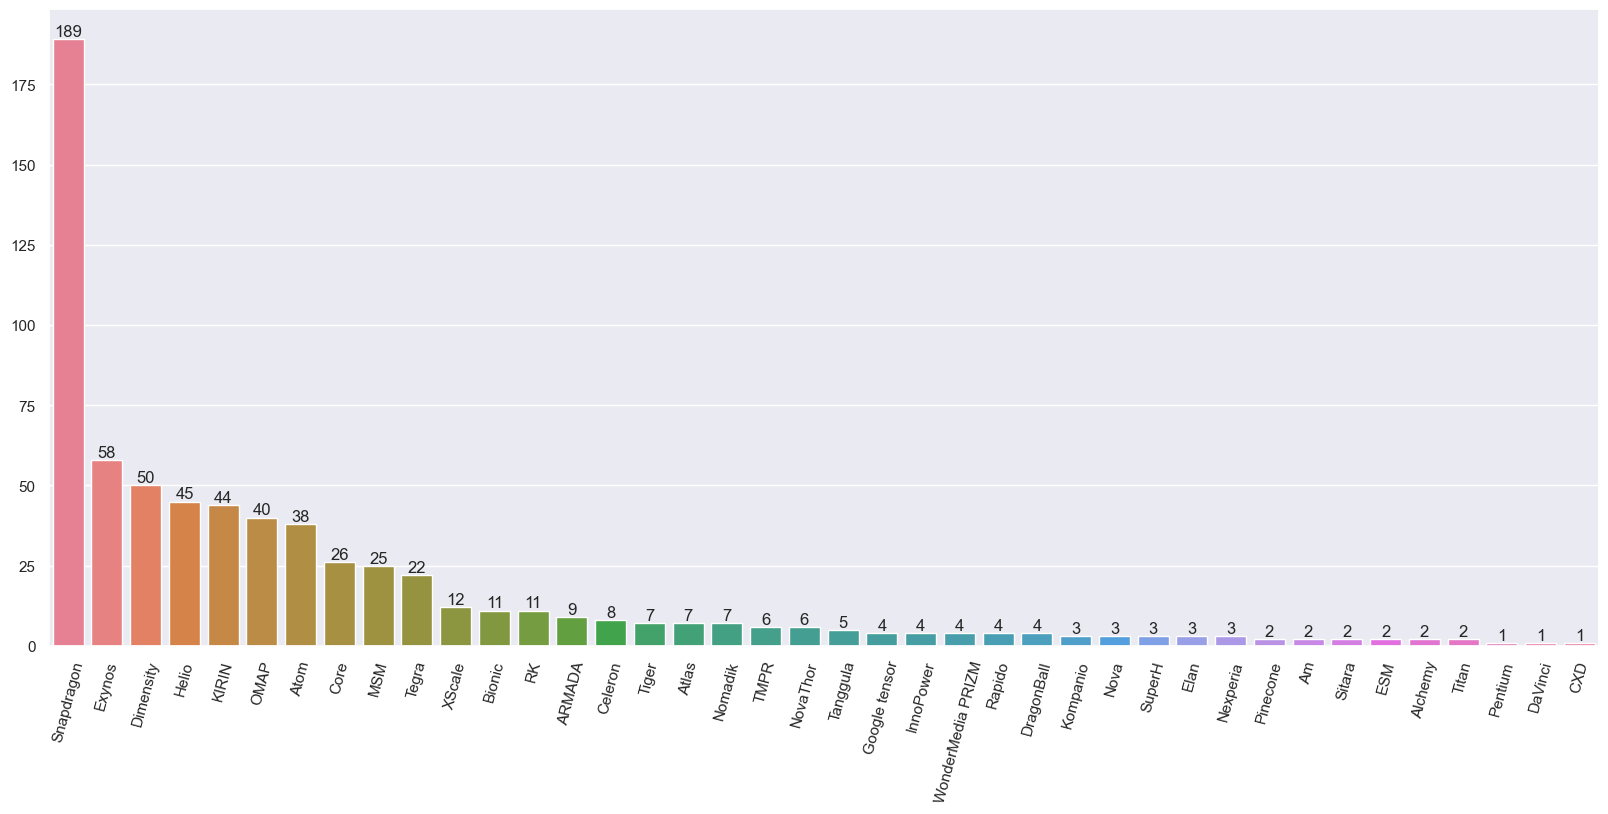

In [25]:
dfTemp = dfN.dropna(subset='Serie').copy()
HProComp=dfTemp[f'{col[0]}'].value_counts().to_dict()
HProSerie=dfTemp[f'{col[1]}'].value_counts().to_dict()

plt.figure()
figHist = sns.barplot(x=HProComp.keys(), y=HProComp.values(), hue=HProComp.keys())
figHist.set_xticklabels(HProComp.keys(), rotation=75)
for container in figHist.containers:
    figHist.bar_label(container)
cons.print('Top Companies with Highest number of chips =>')
for key, value in HProComp.items():
    print(f'{key} : {value}', end=', ')


print('\n')


plt.figure()
figHist2 = sns.barplot(x=HProSerie.keys(), y=HProSerie.values(), hue=HProSerie.keys())
figHist2.set_xticklabels(HProSerie.keys(), rotation=75)
for container in figHist2.containers:
    figHist2.bar_label(container)
cons.print('Top Series that are in use the most =>')
for key, value in HProSerie.items():
    print(f'{key} : {value}', end=', ')


### Columns to their respective count

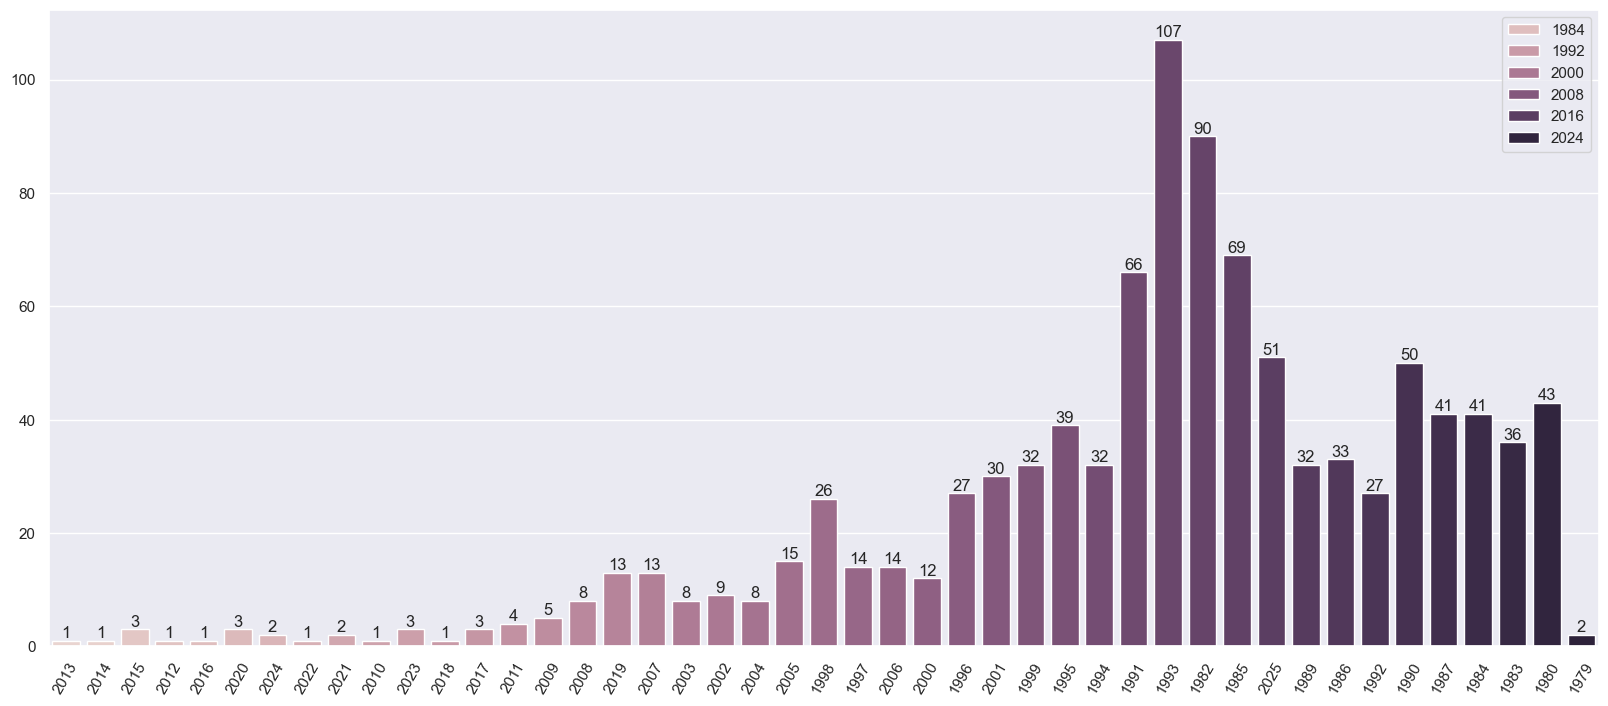

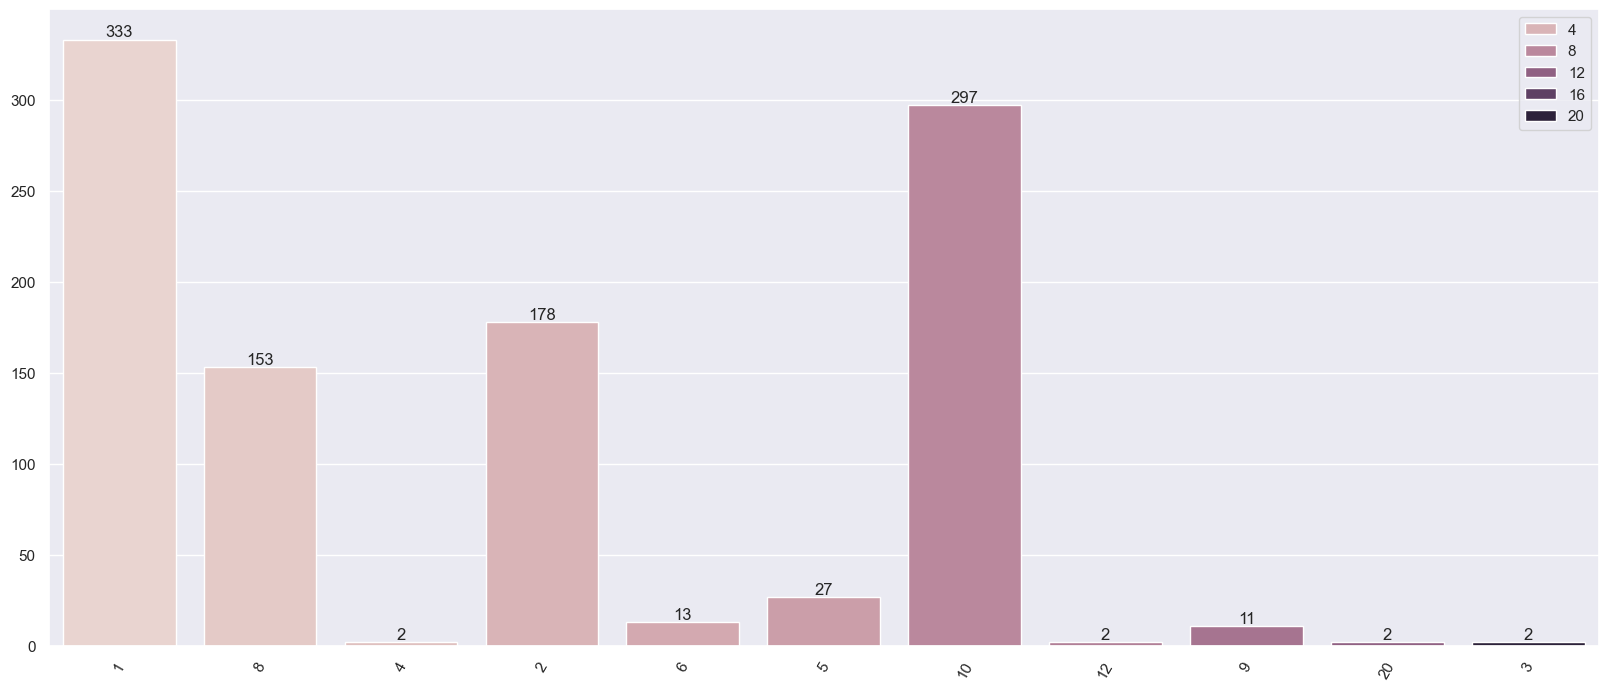

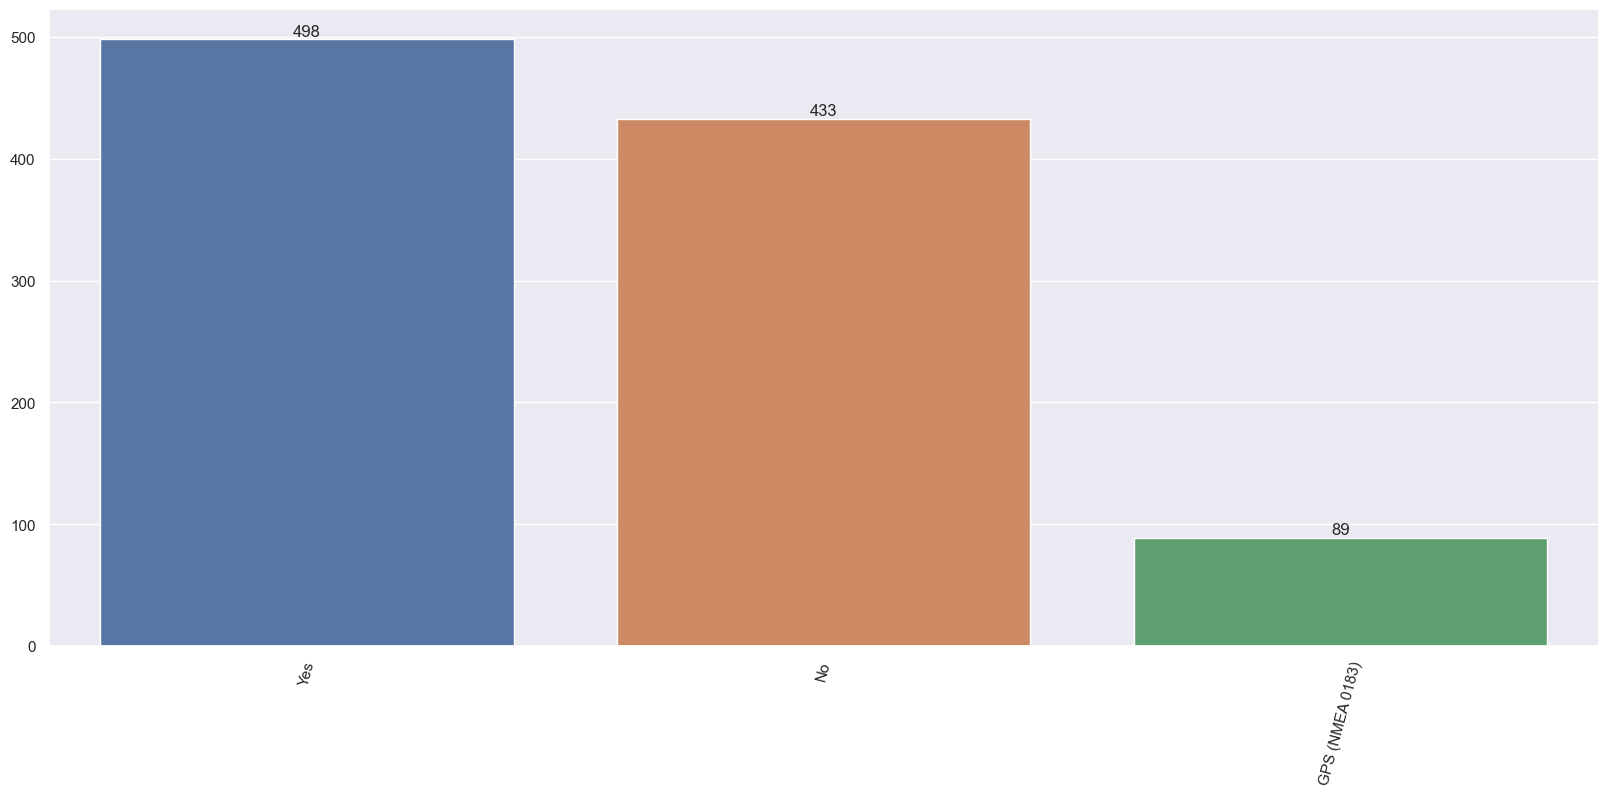

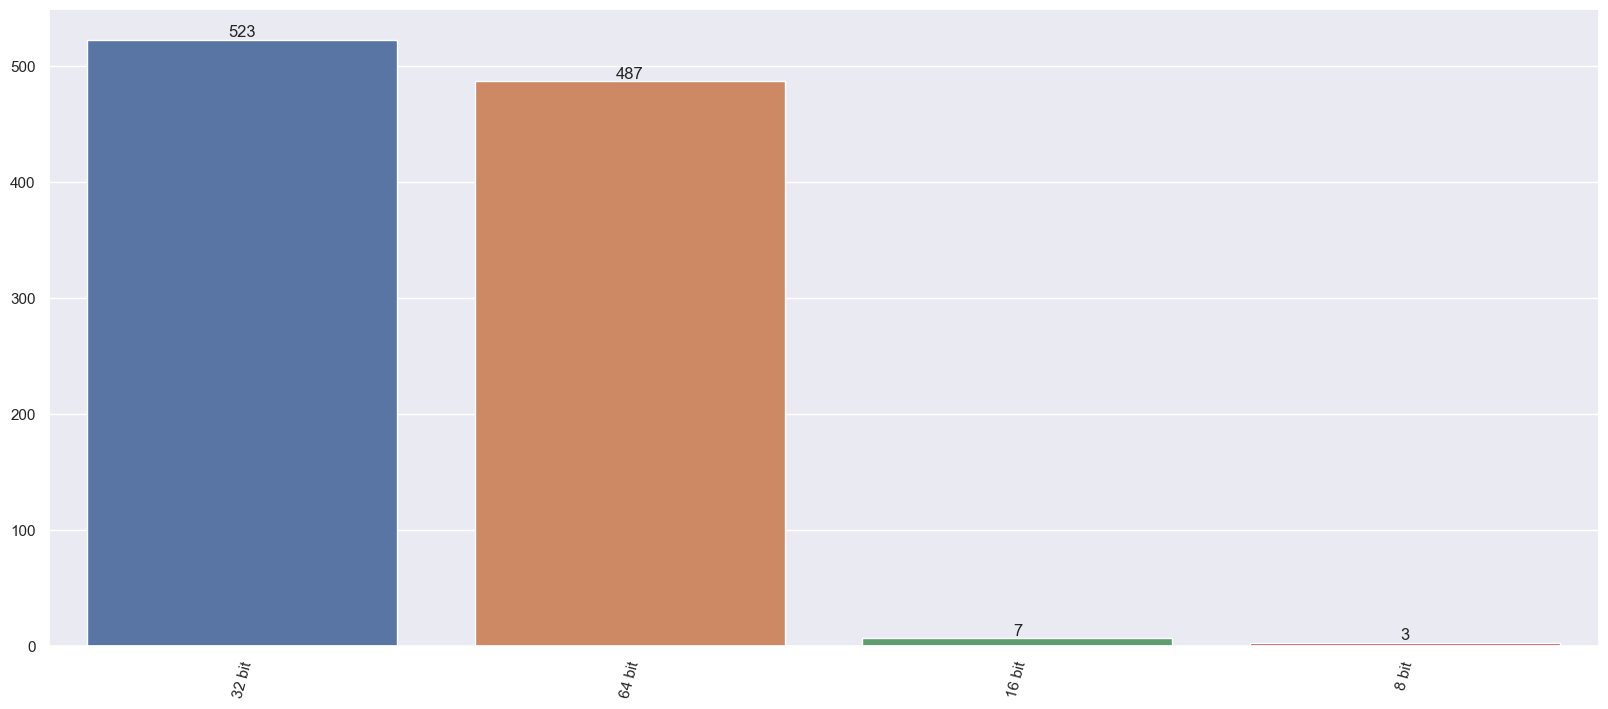

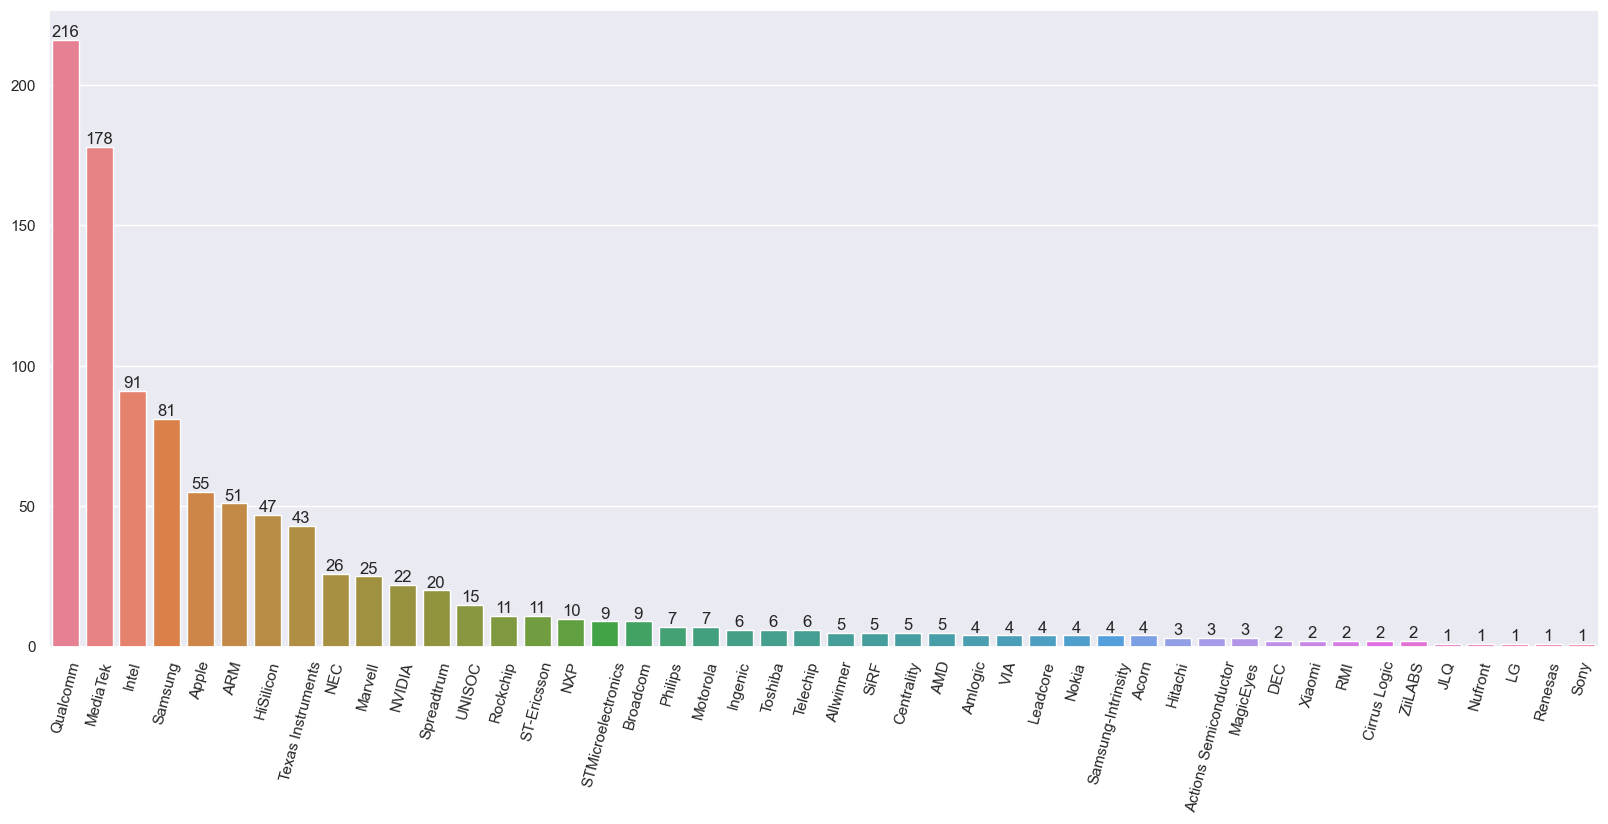

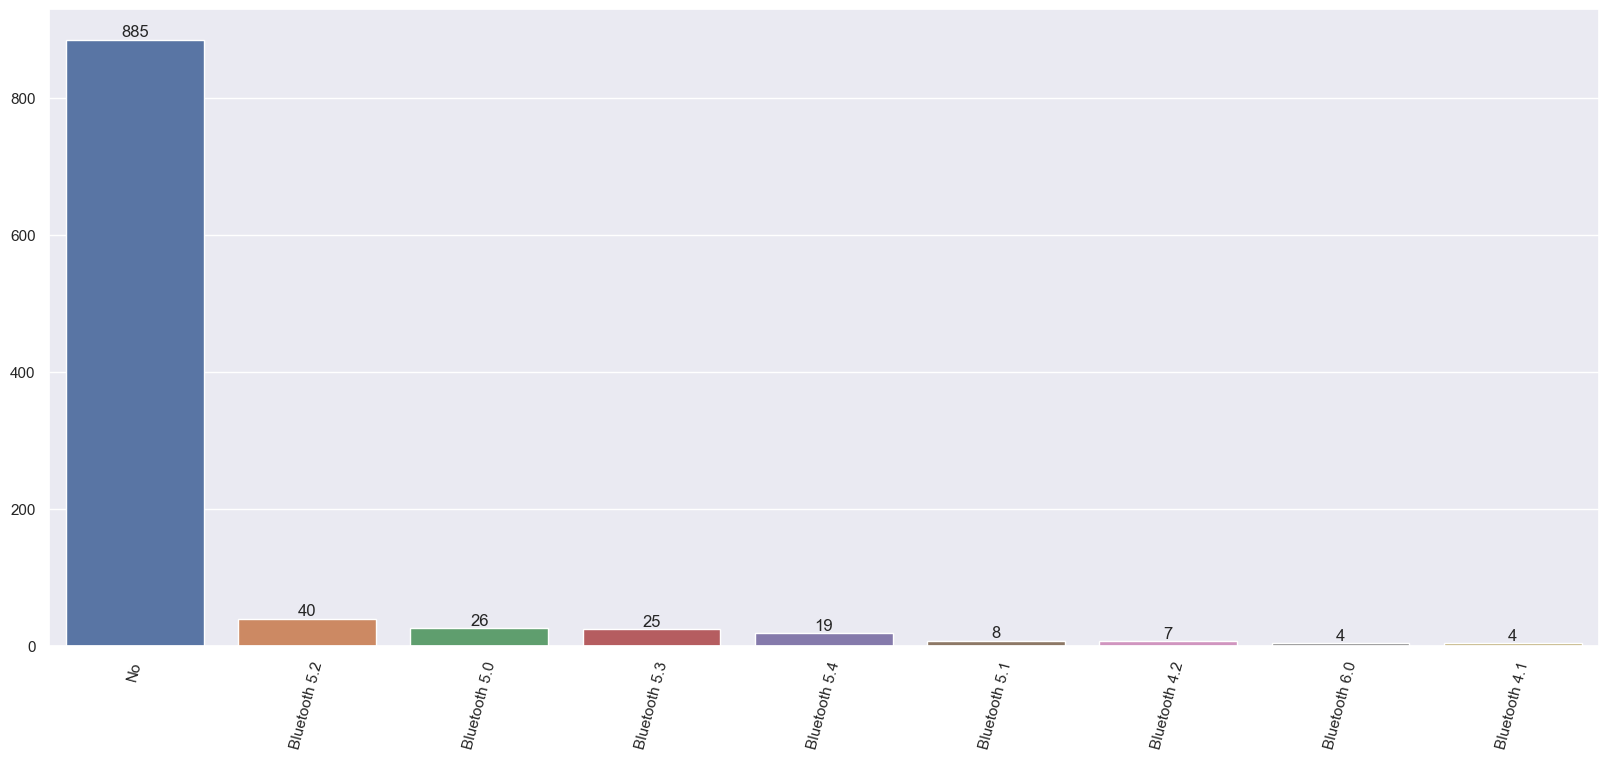

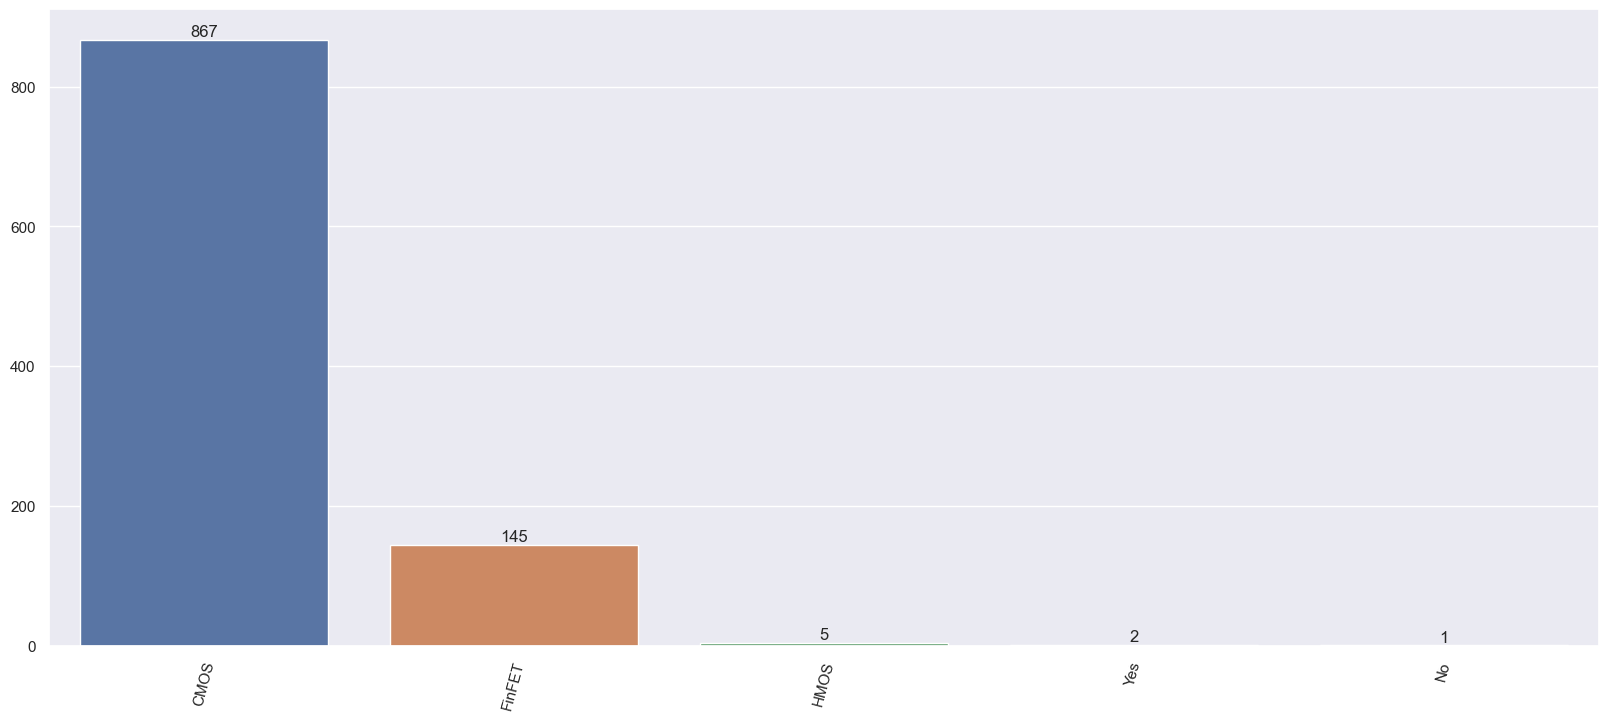

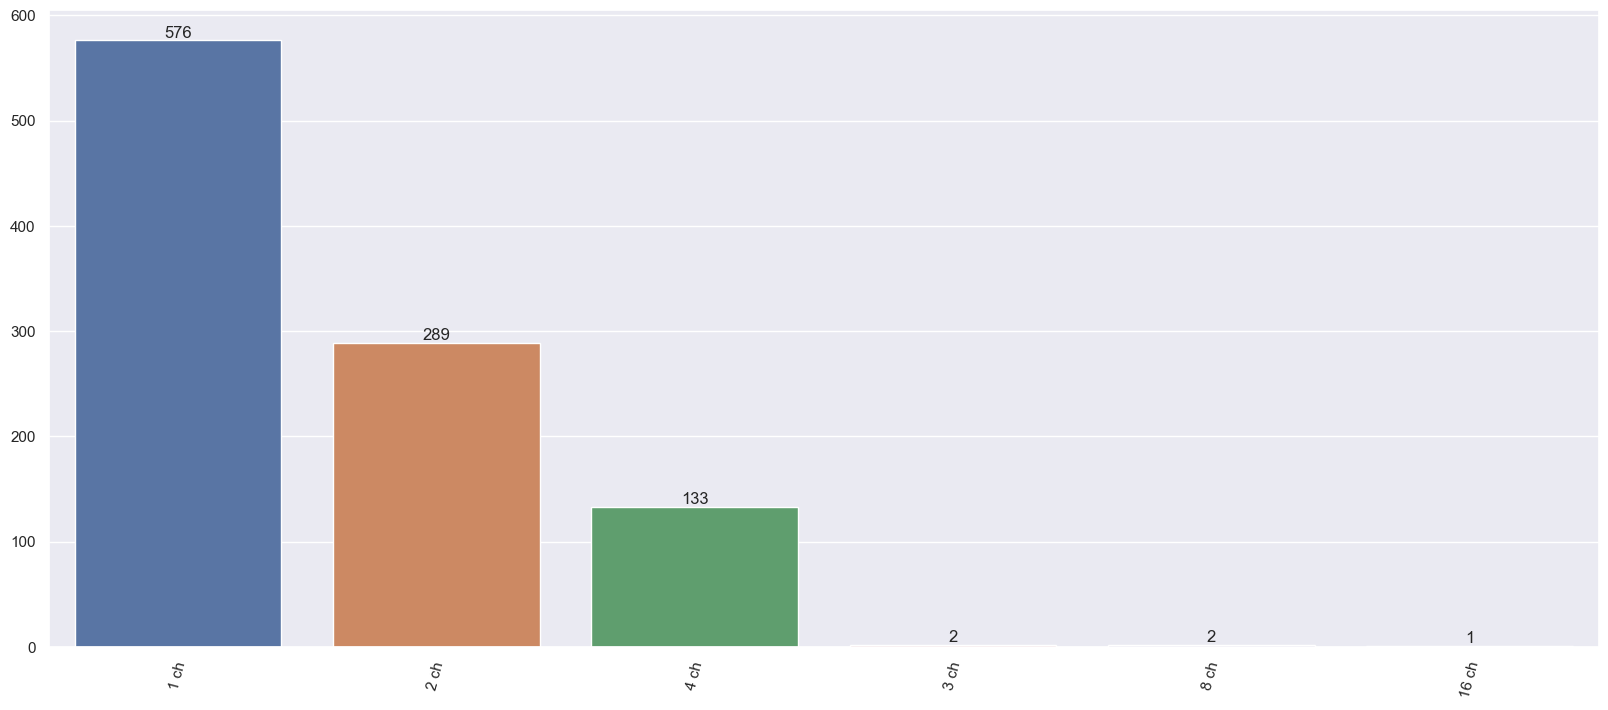

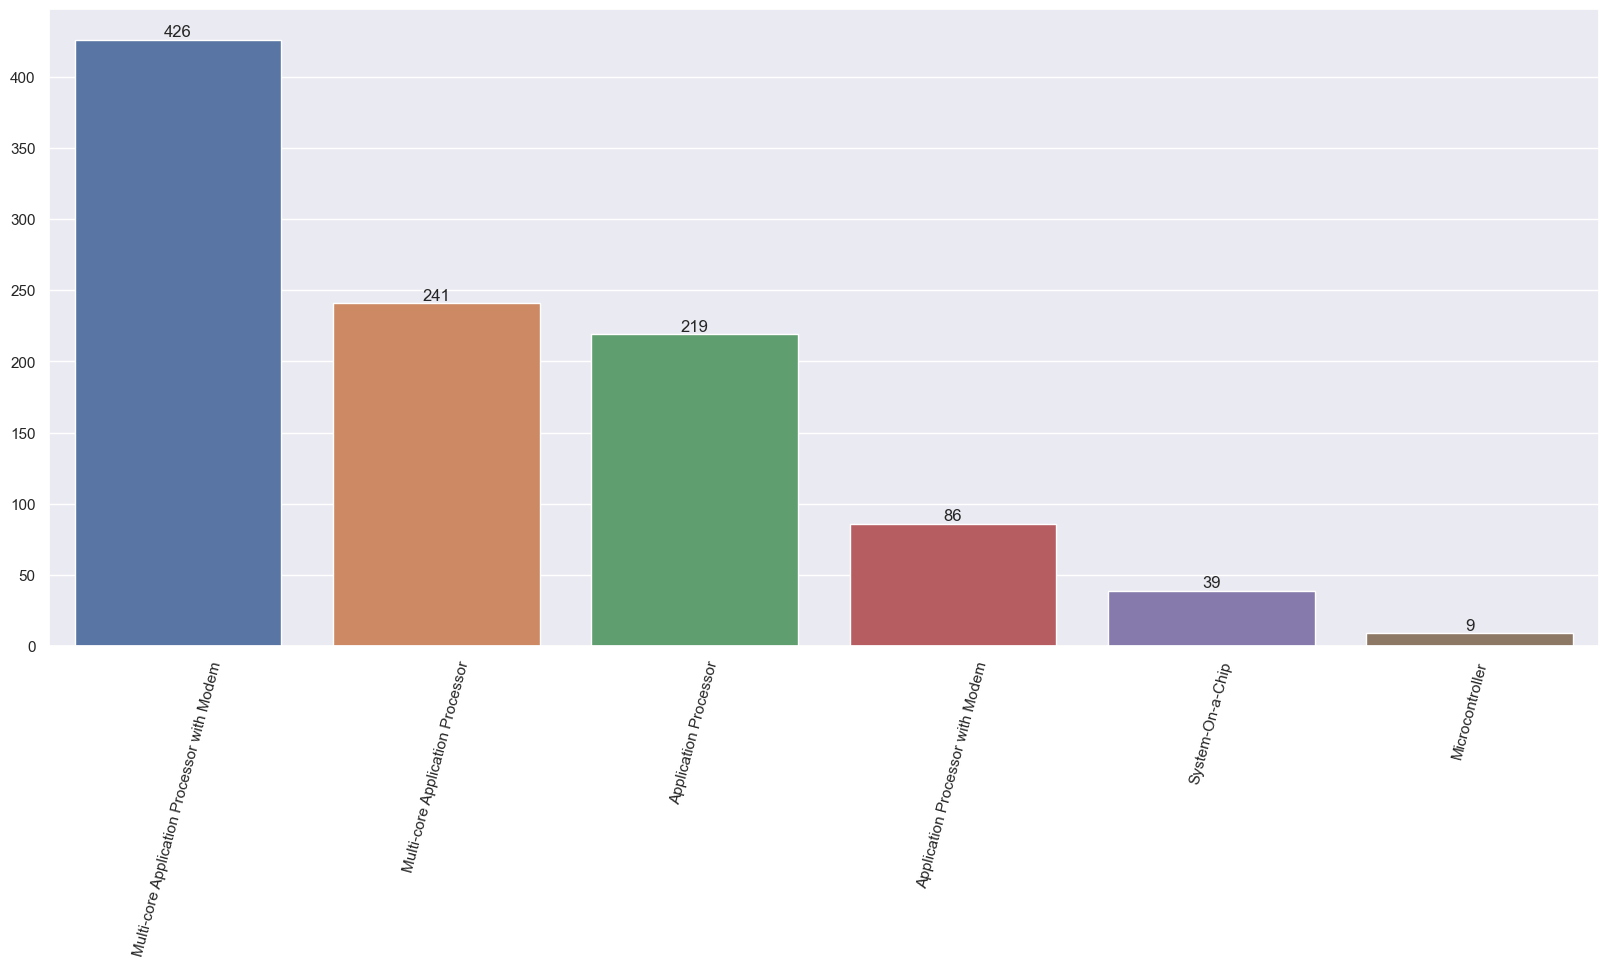

In [30]:
dfTemp = dfN.drop(columns=['Wireless LAN support','Supported Instruction Set(s)','Memory Interface(s)','Supported Audio/Video Interface','Supported USB Specification', 'Non-volatile Memory Interface'])
temp = ['Wireless LAN support','Supported USB Specification', 'Supported Instruction Set(s)','Memory Interface(s)','Supported Audio/Video Interface','Non-volatile Memory Interface']
col2 = set(col2) - set(temp)
for value in col2:
    if value == 'Year Released' or value == 'Number of processor core(s)':
        dictTemp = dfTemp[f'{value}'].value_counts().to_dict()
        plt.figure()
        figBar = sns.barplot(x=dictTemp.keys(), y=dictTemp.values(), hue=dictTemp.keys())
        figBar.set_xticklabels(dictTemp.keys(), rotation=60)
        for container in figBar.containers:
            figBar.bar_label(container)
        # figBar = px.bar(x=dictTemp.keys(), y=dictTemp.values(), color=dictTemp.keys(), color_continuous_scale=px.colors.sequential.Peach, title=f'{value}')
        # figBar.update_layout(height=750).show()
    else:
        dictTemp = dfTemp[f'{value}'].value_counts().to_dict()
        plt.figure()
        figHist = sns.barplot(x=dictTemp.keys(), y=dictTemp.values(), hue=dictTemp.keys())
        figHist.set_xticklabels(dictTemp.keys(), rotation=75)
        for container in figHist.containers:
            figHist.bar_label(container)
        # figHist = px.histogram(x=dictTemp.keys(), y=dictTemp.values(), color=dictTemp.keys(), color_discrete_sequence=px.colors.qualitative.Vivid, title=f'{value}')
        # figHist.update_layout(height=750).show()

In [31]:
dfTemp

,Designer,Serie,Type,Year Released,Function,Width of Machine Word,Type of processor core(s),Number of processor core(s),Max. Clock Frequency of Memory IF,Data Bus Width,...,GPU Clock,Dedicated Graphics Memory,Supported Cellular Data Links,Bluetooth support,NFC support,Supported GPS protocol(s),Supported Galileo service(s),Supported GLONASS protocol(s),Supported BeiDou system (BDS),Special Features
0,Apple,Bionic,A16 Bionic Lite APL1010 / APL1W10,2025,Multi-core Application Processor,64 bit,2x Apple Everest + 3x Apple Sawtooth cores,5,3200 MHz,16 bit,...,1338 MHz GPU,NaN,No,No,NaN,GPS (NMEA 0183),Yes,Yes,B1I BeiDou receiver,2x high-performance Apple Everest 64-bit ARMv8...
1,Apple,NaN,M3 Lite APL1201 T8122,2025,Multi-core Application Processor,64 bit,4x Apple Everest + 4x Apple Sawtooth cores,8,3200 MHz,64 bit,...,1338 MHz GPU,NaN,No,No,NaN,GPS (NMEA 0183),Yes,Yes,B1I BeiDou receiver,4x high-performance 64-bit ARMv8-compatible (A...
2,Samsung,Exynos,Exynos 1580 5G S5E8855,2024,Multi-core Application Processor with Modem,64 bit,4x ARM Cortex-A720 + 4x ARM Cortex-A520 MPcore,8,3200 MHz,16 bit,...,1300 MHz GPU,NaN,"CSD 9.6 kbps , GPRS (Class unspecified) , GPRS...",Bluetooth 5.4,"NFC A , NFC B",Yes,"E1 , E5a","L1OF , L2OF","B1I , B2a BeiDou receiver",single ARM Cortex-A720 (up to 2.91 GHz) + trip...
3,Apple,NaN,S10,2024,System-On-a-Chip,64 bit,2x Apple Sawtooth cores,2,NaN,NaN,...,NaN,NaN,No,Bluetooth 5.3,NaN,Yes,E1,L1OF,NaN,2x Apple Sawtooth Harvard Superscalar processo...
4,Apple,NaN,A18 APL1008 / APL1V08,2024,Multi-core Application Processor,64 bit,2x Apple Tupai P + 4x Apple Tupai E cores,6,3750 MHz,16 bit,...,1470 MHz GPU,NaN,No,No,NaN,GPS (NMEA 0183),Yes,Yes,"B1c , B1I , B2a BeiDou receiver",2x Harvard Superscalar Apple Tupai Performance...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,Intel,NaN,80186,1982,Application Processor,16 bit,Intel 80186,1,NaN,16 bit,...,NaN,NaN,No,No,NaN,No,NaN,NaN,NaN,NaN
1017,NEC,NaN,V20 uPD70108,1982,Application Processor,8 bit,NEC V20,1,NaN,8 bit,...,NaN,NaN,No,No,NaN,No,NaN,NaN,NaN,NaN
1018,NEC,NaN,V20H uPD70108H,1982,Application Processor,8 bit,NEC V20,1,NaN,8 bit,...,NaN,NaN,No,No,NaN,No,NaN,NaN,NaN,NaN
1019,Hitachi,NaN,HD6303X,1980,Application Processor,8 bit,NaN,1,NaN,8 bit,...,NaN,NaN,No,No,NaN,No,NaN,NaN,NaN,192 bytes RAM
